

# **Project Name**



<h1>Health Insurance Cross Sell Prediction

# **Problem Statement**

Predict Health Insurance Owners' who will be interested in Vehicle Insurance

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.



<B><h3>Objective</B>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# **Project Work flow**

<h1><b>Project Work flow</b></h1>

Importing Libraries

Loading the Dataset

EDA on features

Feature Engineering

Data Cleaning

Feature selection

Fitting the classification model

Comparison of Models



Conclusion

<h1><b>Data Defination<b><h1>

<b>*Attribute </b>: Description (Data Type)*

*<b>id </b>* : Unique ID for customer

*<b>Gender</b>* : Male/Female

*<b>Age </b>* : Age of customer

*<b>Driving License</b>* : Customer has DL or not

*<b>Region_Code</b>* : Unique code for the region of the
customer

*<b>about_speakers</b>* : Blurb about each speaker (dictionary)

*<b>Previously_insured</b>* : Customer already has vehicle insurance
or not

*<b>Vehicle_age</b>* : Age of the vehicle

*<b>Vehicle_damage</b>* : Past damages present or not

*<b>Annual_premium</b>* : The amount customer needs to pay as
premium

*<b>Policysales_Channel</b>*: anonymized Code for the channel of
outreaching to the customer ie.
Different Agents, Over Mail, Over Phone,
in Person, etc

*<b>Vintage</b>* :Number of Days, Customer has been
associated with the company

*<b>Response</b>* : Customer is interested or not



# **GitHub Link -**

<B>NAME</B>: Mohit Sonwane

<B>GITHUB</B> : https://github.com/mohitsonwane786/Health_Insurance_Cross_Sell_Prediction.git

# ***Let's Begin !***

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [6]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Dataset
path = '/content/drive/MyDrive/2nd ML Classification Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(path)

In [8]:
final_df = df

<b><h1>Get familiar with dataset</h1></b>

<Axes: >

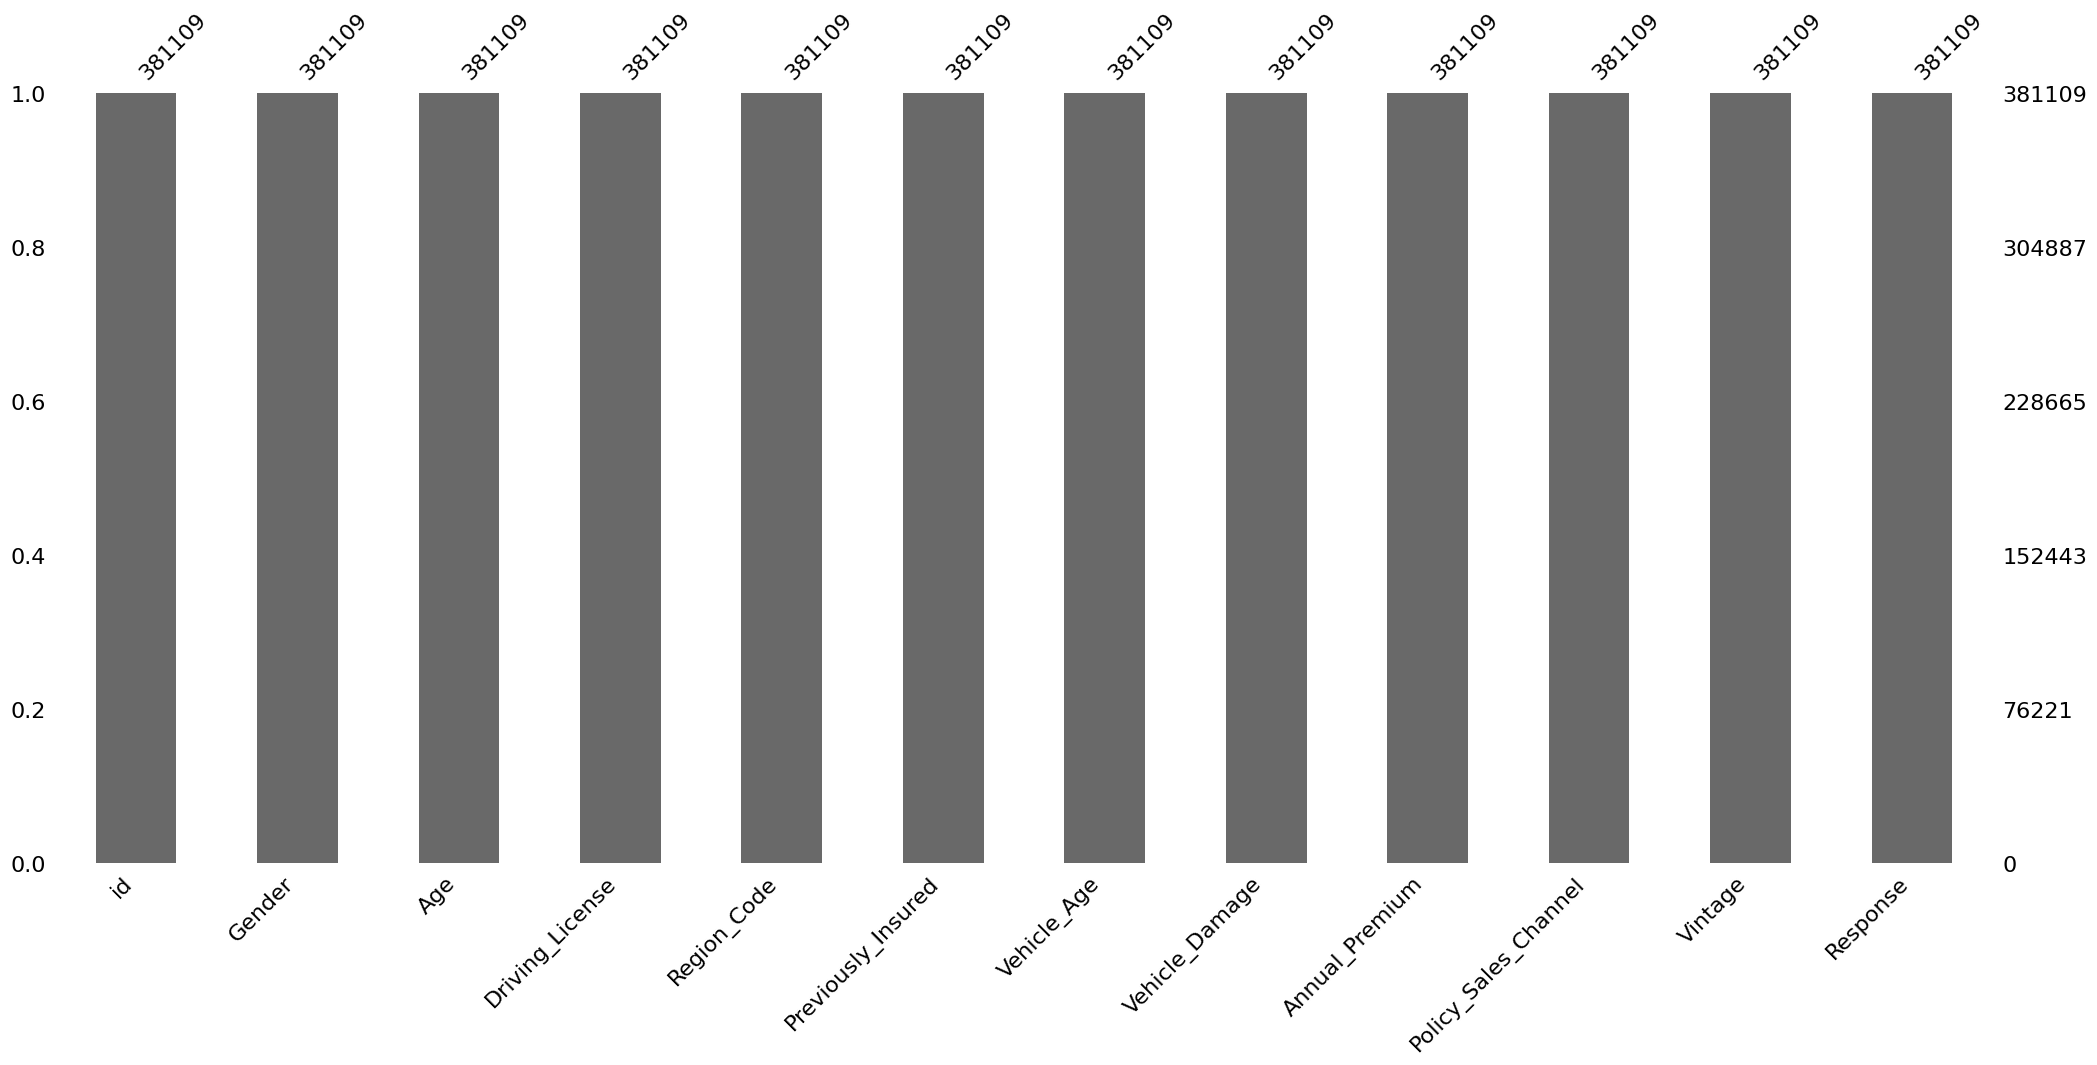

In [9]:
import missingno as msno # To check missing value visually
msno.bar(df)

In [10]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

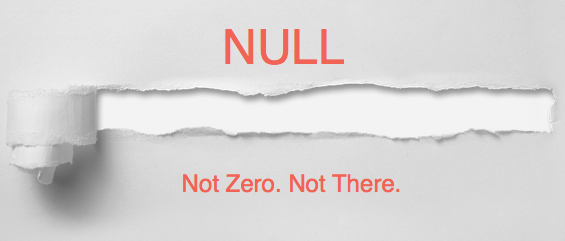

In [11]:
df.shape

(381109, 12)

**rows:** 381109 <br>
**columns:** 12

In [12]:
df.describe

<bound method NDFrame.describe of             id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                  

In [13]:
df.info

<bound method DataFrame.info of             id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0

In [14]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


![alt text](https://www.hoji.co.ke/wp-content/uploads/2018/08/no-duplicates-img.png)

In [15]:
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [16]:

# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [17]:
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


In [18]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

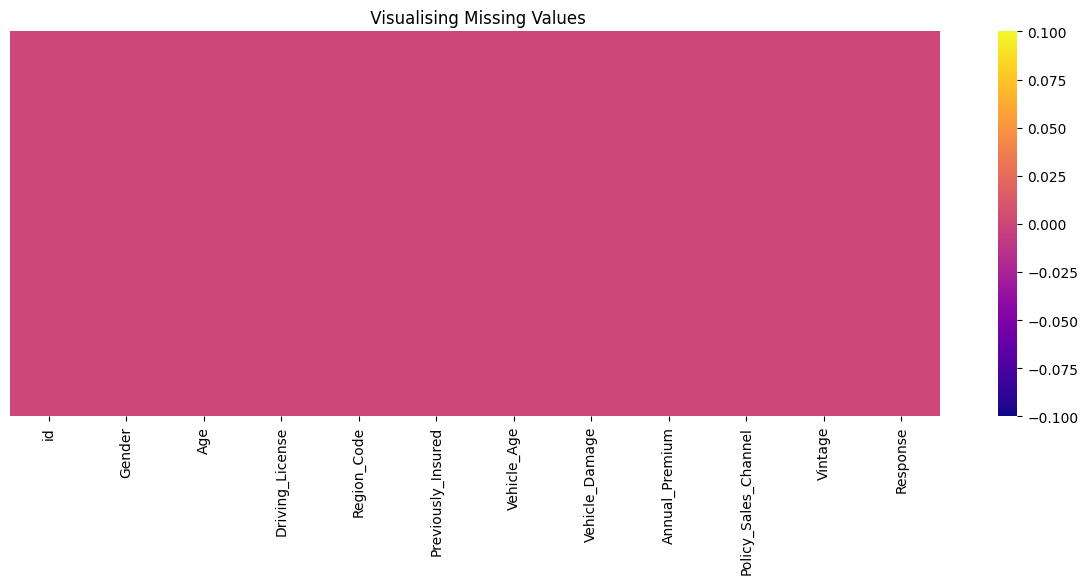

In [19]:

# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [20]:


# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [21]:
df[df['Response']==0]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<B>Check Unique Values for each variable</B>

In [22]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [23]:
variables_df

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

<B><h1>Lets Do Some Data Wrangling

In [24]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [25]:
print("Numerical Columns")
print(numerical_columns)

Numerical Columns
['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [26]:
print("Categorical Columns")
print(categorical_columns)

Categorical Columns
['Response', 'Driving_License', 'Vehicle_Damage', 'Vehicle_Age', 'Previously_Insured', 'Gender']


In [27]:
dfas = pd.DataFrame(df, columns = ['EMPID', 'Age',
                                    'Region_Code', 'Annual_Premium',
                                    'Policy_Sales_Channel'])

<B><h1>create histogram for numeric data

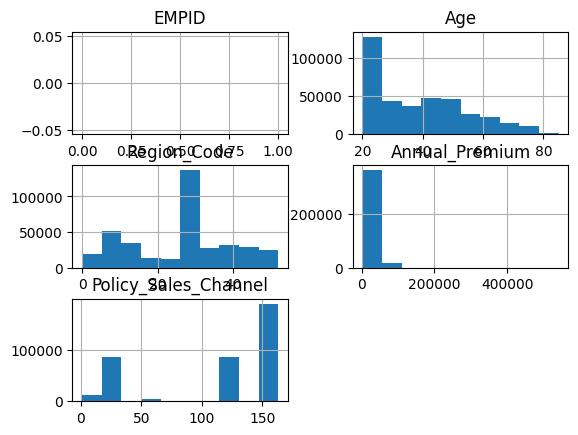

<Figure size 1000x600 with 0 Axes>

In [28]:
# create histogram for numeric data
dfas.hist()

# show plot
plt.figure(figsize=(10,6))
plt.show()

<B><h1>Checking for outliers</B>

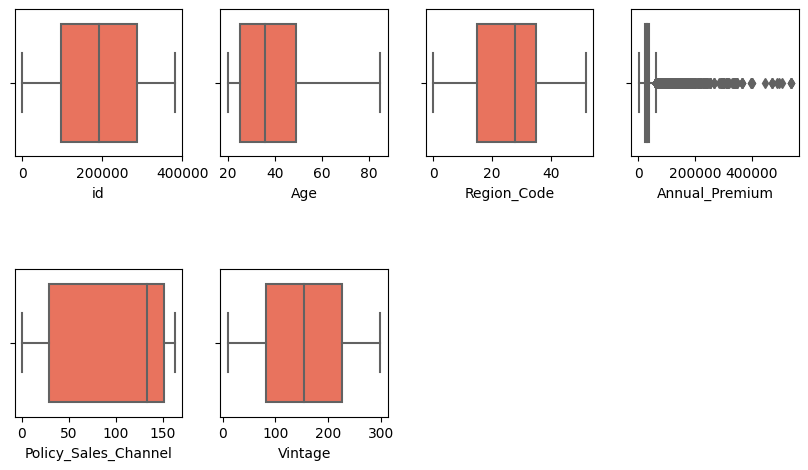

In [29]:

#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<B> As From Above graph , We are clearly able to see that Column name Annual Premium has lots of outliers and we are not used it so effectively further in our model hence we going to drop that column

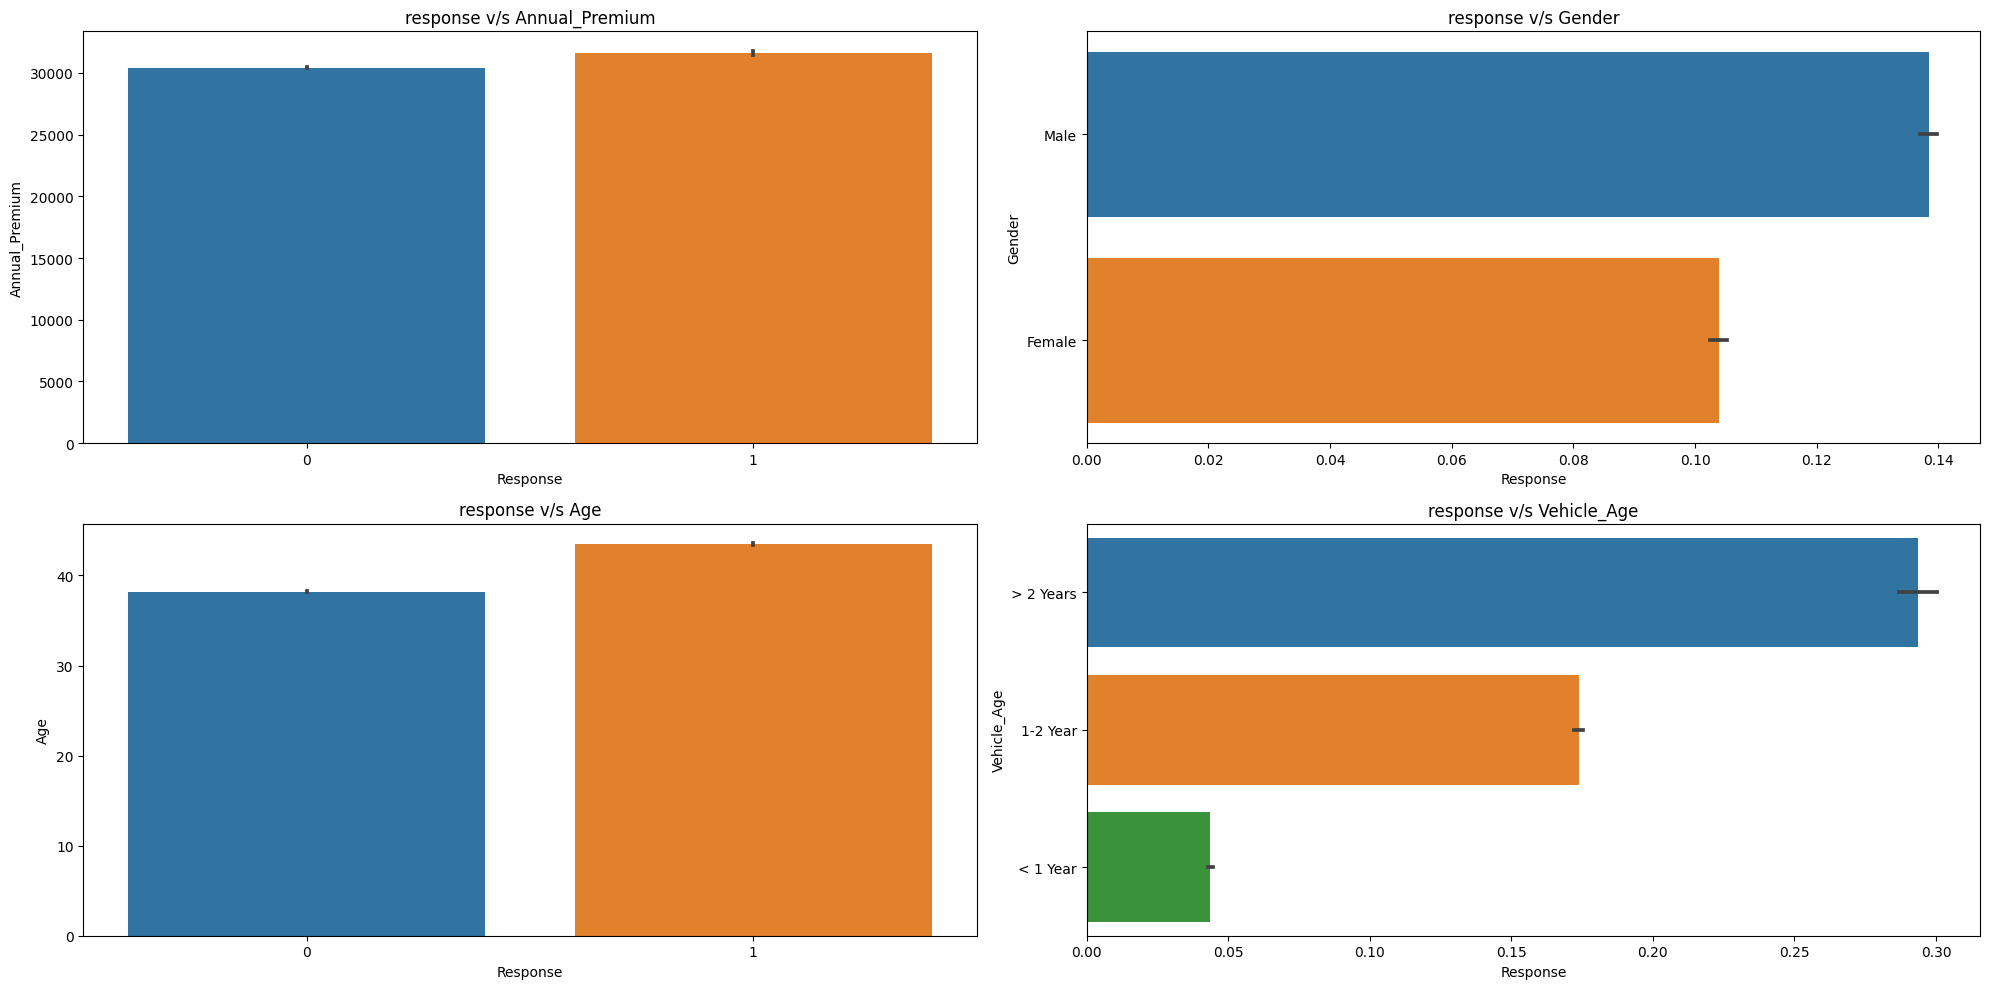

In [30]:
# Chart - 1 visualization code
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))



rows=2
cols=2
counter=1

variables=[ 'Annual_Premium' , 'Gender' , 'Age' , 'Vehicle_Age']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['Response'],y=df[var])
  plt.title(f'response v/s {var}')
  counter=counter+1
  plt.tight_layout()

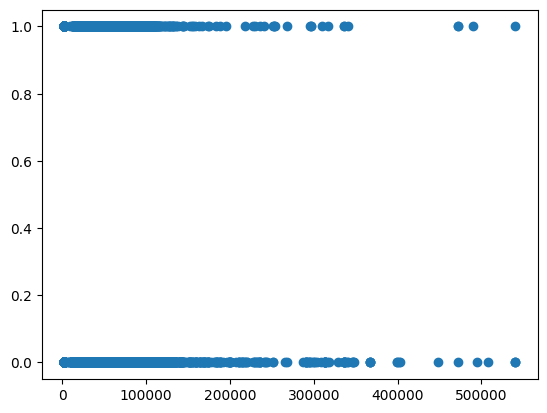

In [31]:
plt.scatter(df['Annual_Premium'], df['Response'])

plt.show()


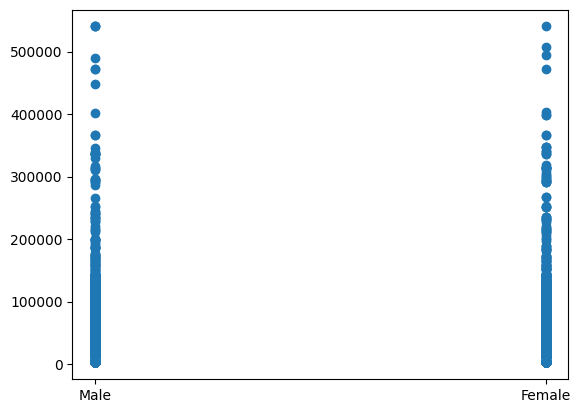

In [32]:
plt.scatter( df['Gender'], df['Annual_Premium'])

plt.show()


In [33]:
a = df[["Age" , "Response" , "Gender"]]

In [34]:
col_list =  list(df['Gender']==0)

<Axes: >

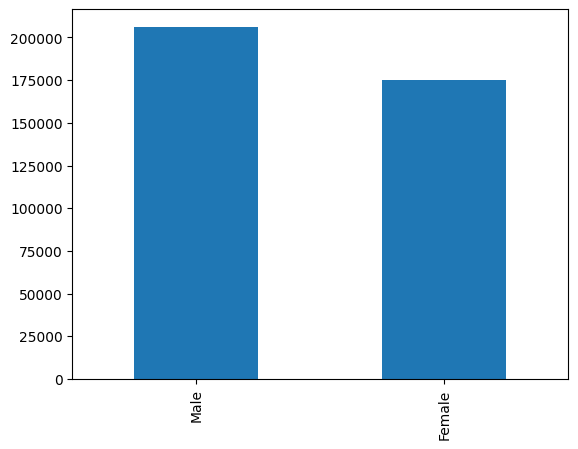

In [35]:
a['Gender'].value_counts().plot(kind='bar')

<B>Count Of Vehicle on basis of Gender

In [36]:
a['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

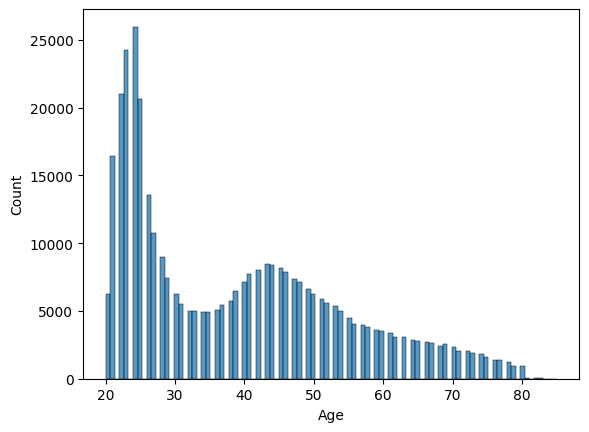

In [37]:
sns.histplot(data = df , x = "Age")
plt.show()

<h1><B>As we can see , Youngster Group Posses most number of vehicles

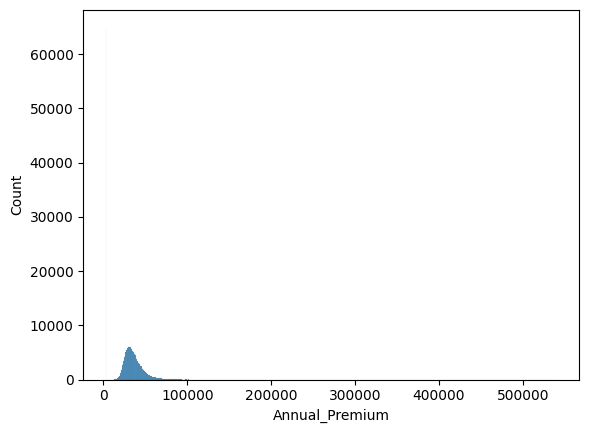

In [38]:
sns.histplot(data = df , x = "Annual_Premium")
plt.show()

In [39]:
df.value_counts("Response")

Response
0    334399
1     46710
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

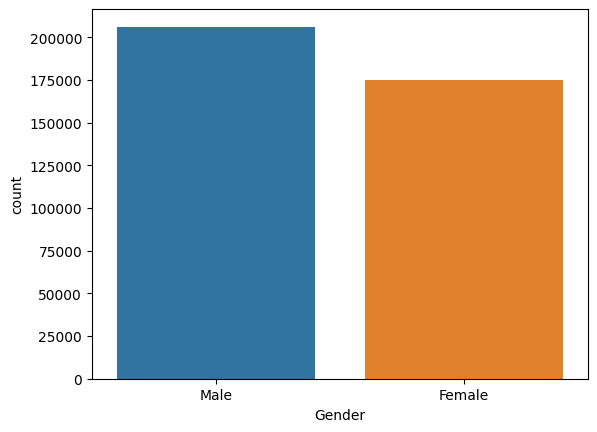

In [40]:
df.value_counts("Gender")
sns.countplot(x ='Gender', data = df)

In [41]:
df.value_counts("Driving_License")

Driving_License
1    380297
0       812
dtype: int64

<Axes: xlabel='Driving_License', ylabel='count'>

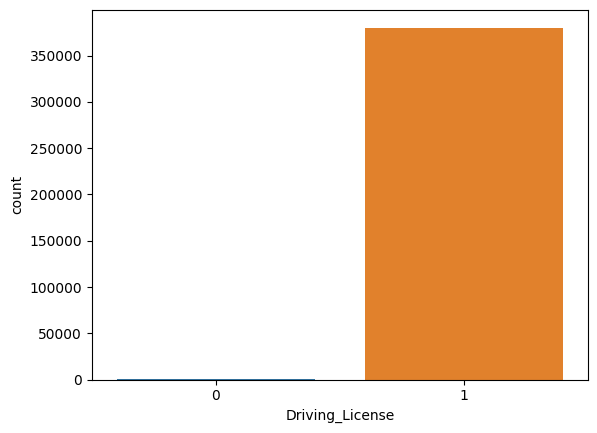

In [42]:
sns.countplot(x ='Driving_License', data = df)

In [43]:
df.value_counts("Vehicle_Age")

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
dtype: int64

<Axes: xlabel='Vehicle_Age', ylabel='count'>

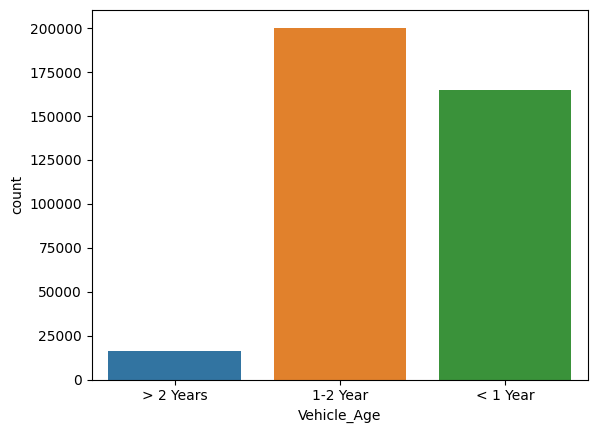

In [44]:
sns.countplot(x ='Vehicle_Age', data = df)

In [45]:
df3 =df.value_counts("Vehicle_Age")

In [46]:
df3.keys()

Index(['1-2 Year', '< 1 Year', '> 2 Years'], dtype='object', name='Vehicle_Age')

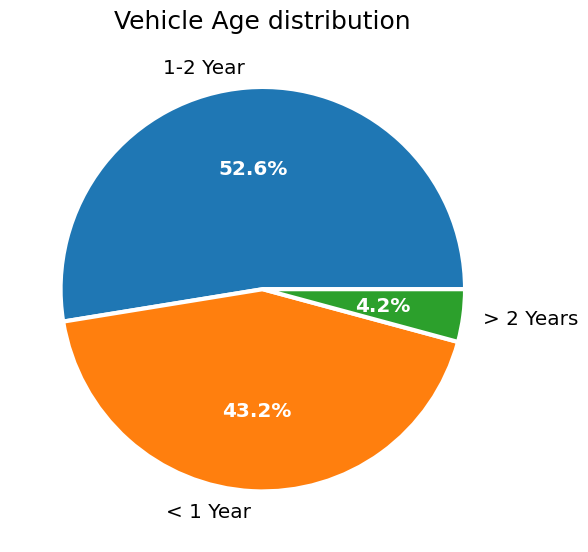

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    df.value_counts("Vehicle_Age"), labels=df3.keys(), autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Vehicle Age distribution', fontsize=18)
plt.tight_layout()

In [48]:
df.value_counts("Previously_Insured")

Previously_Insured
0    206481
1    174628
dtype: int64

<Axes: xlabel='Previously_Insured', ylabel='count'>

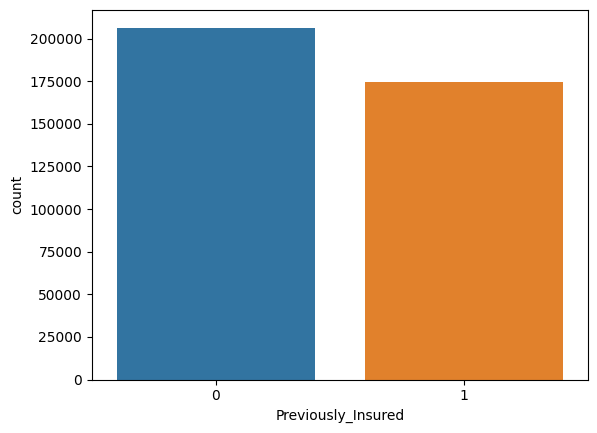

In [49]:
sns.countplot(x ='Previously_Insured', data = df)

In [50]:
df.value_counts("Vehicle_Damage")

Vehicle_Damage
Yes    192413
No     188696
dtype: int64

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

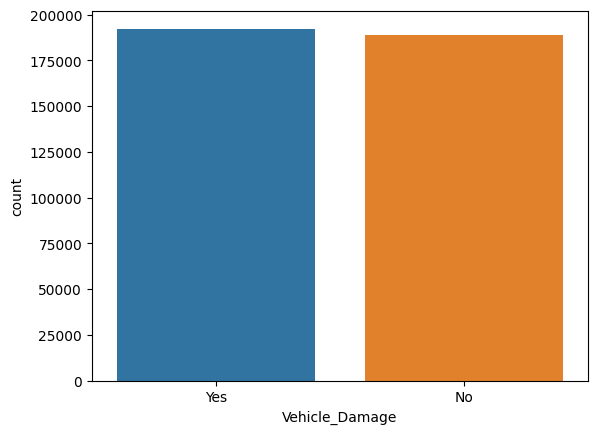

In [51]:
sns.countplot(x ='Vehicle_Damage', data = df)

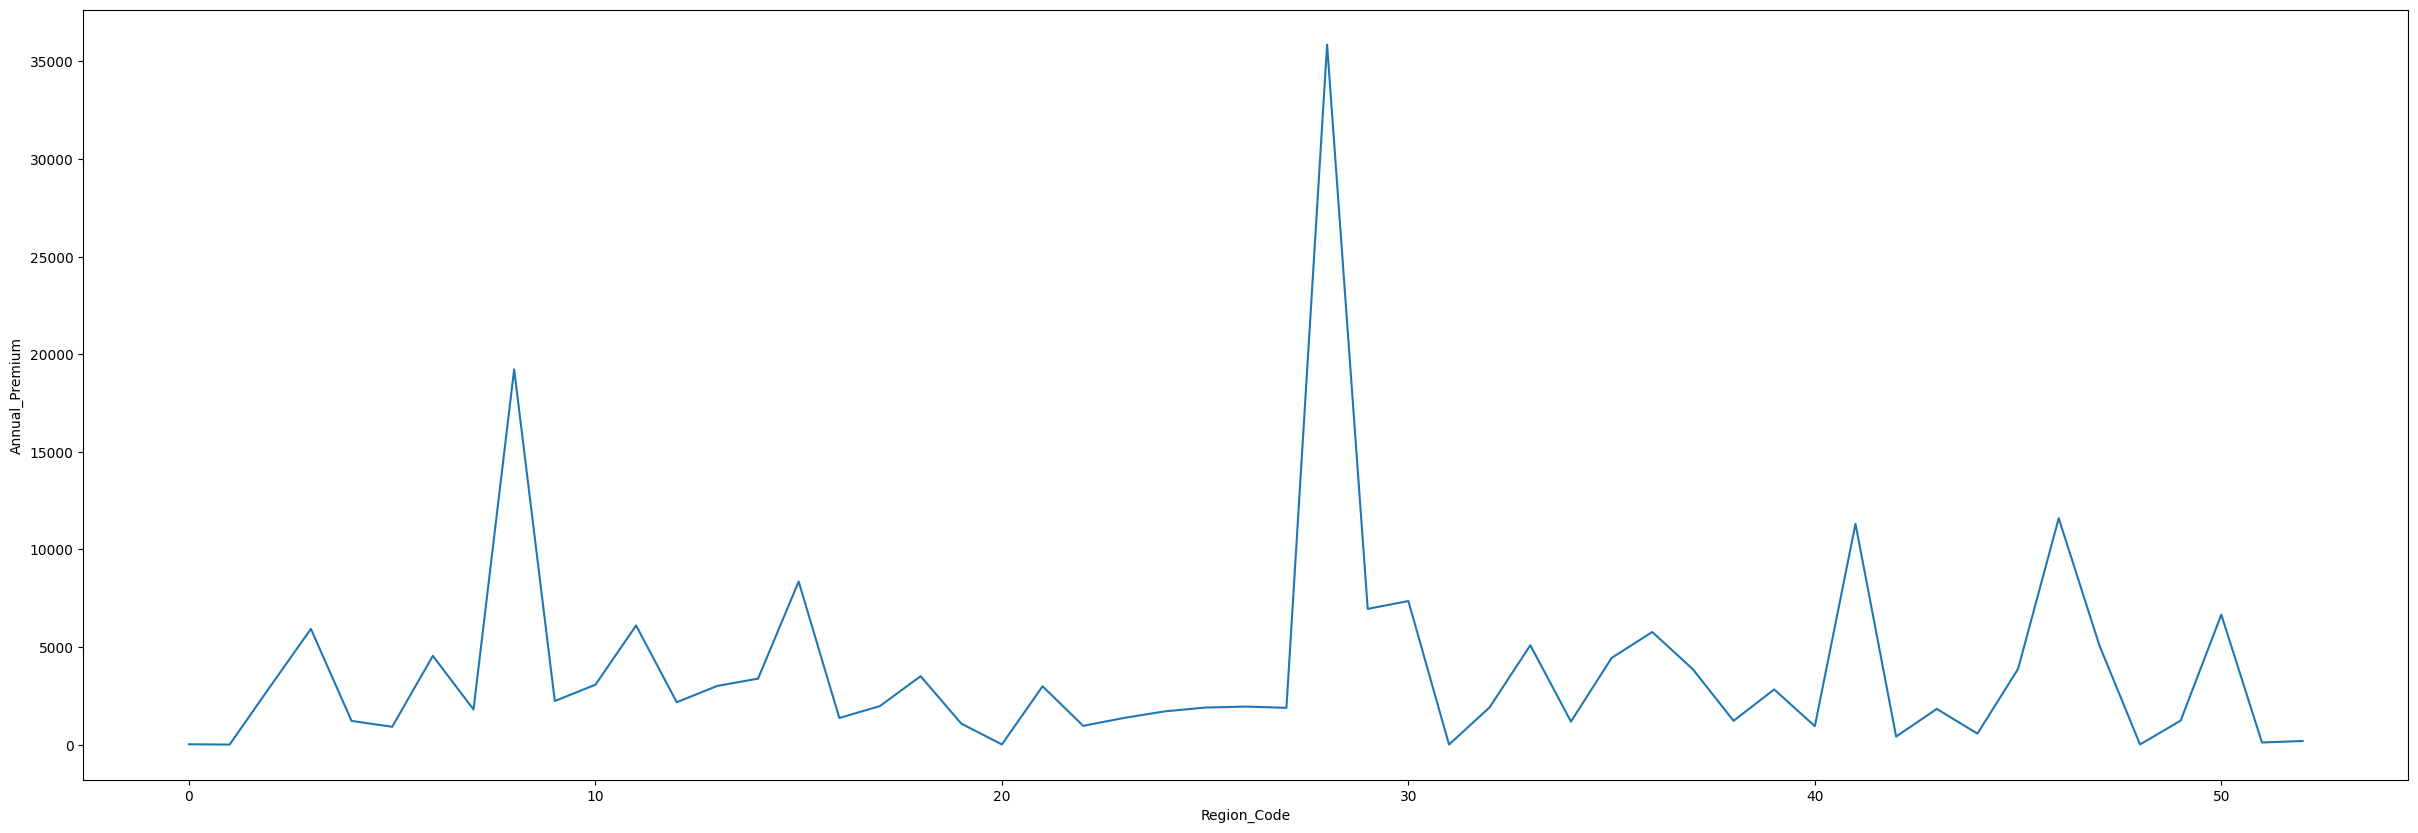

In [52]:
x = df.groupby(["Region_Code"])["Annual_Premium"].nunique()
plt.figure(figsize=(30, 10))
plt.xlabel("Region_Code")
plt.ylabel("Annual_Premium")
plt.plot(x)

In [53]:
numerical_columns

['id',
 'Age',
 'Region_Code',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

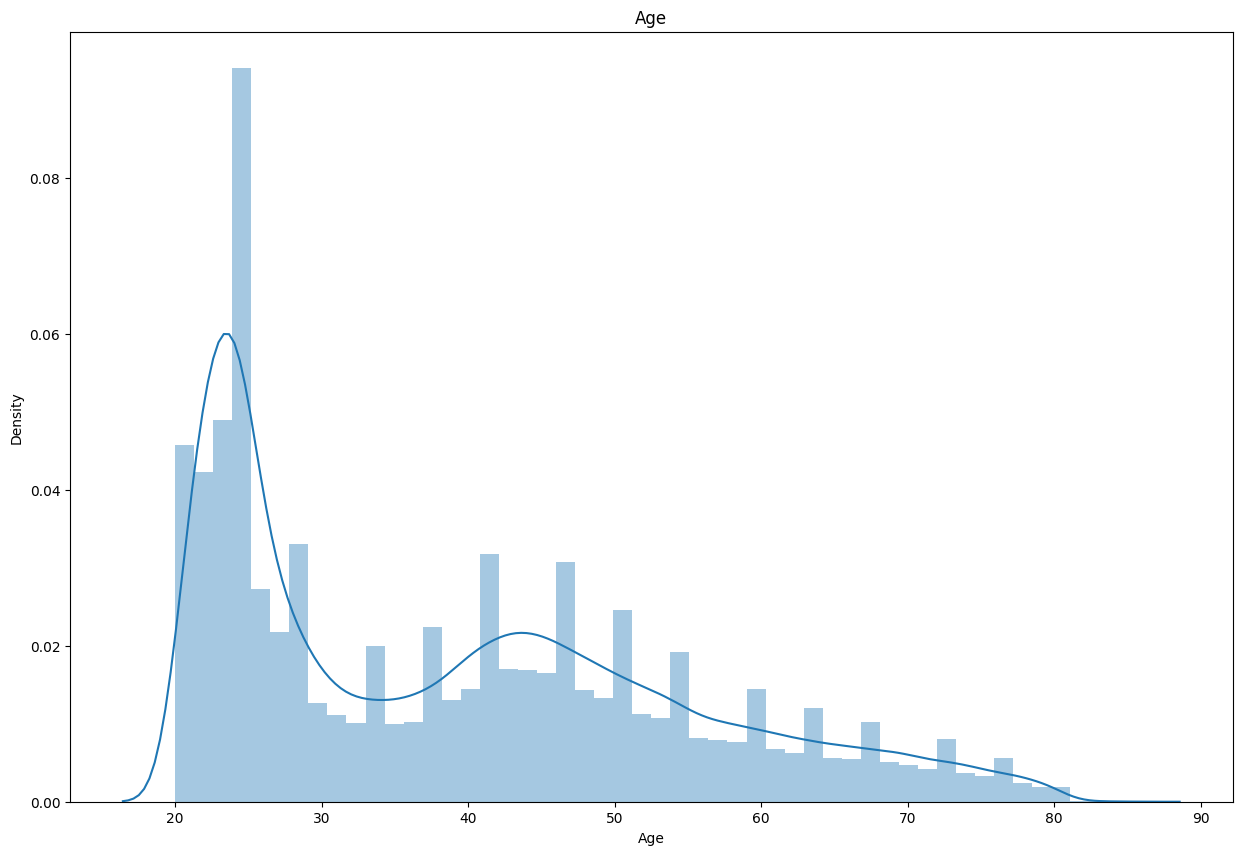

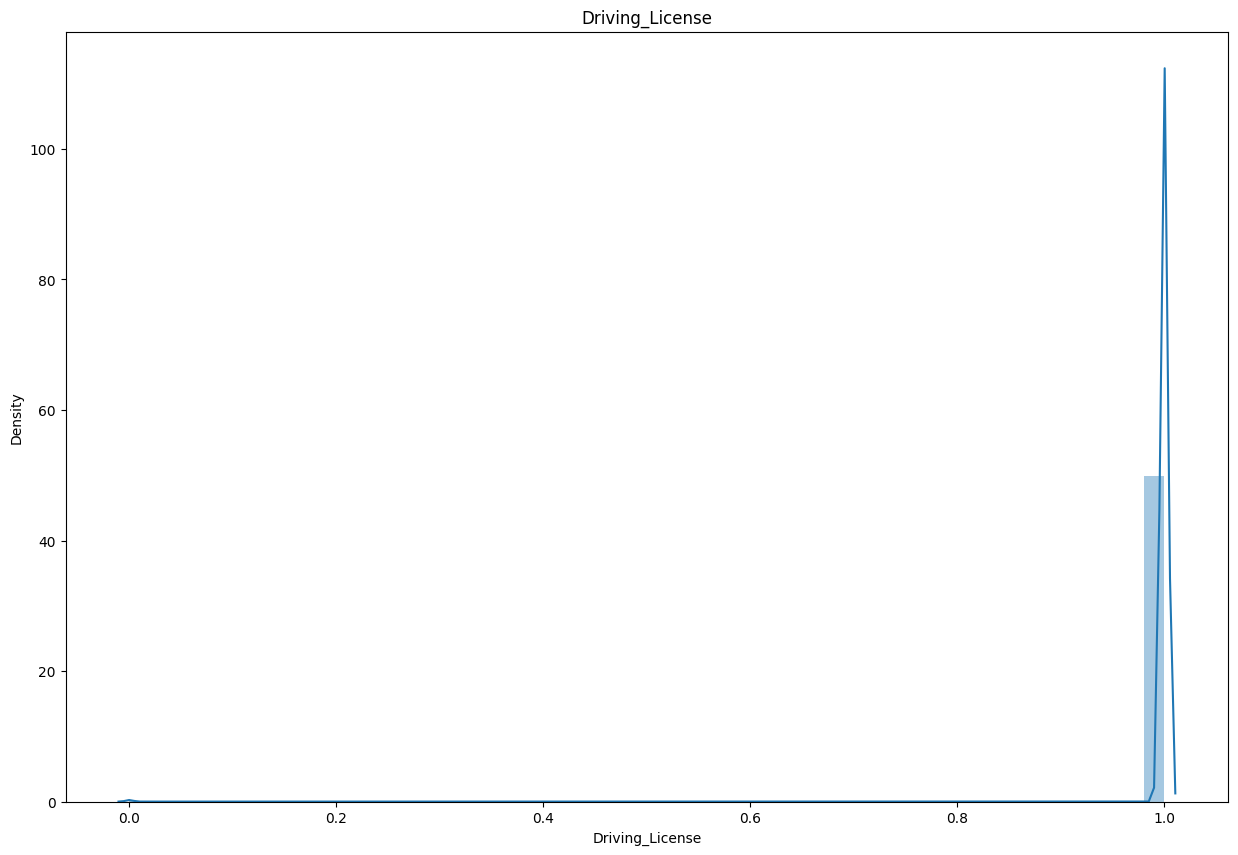

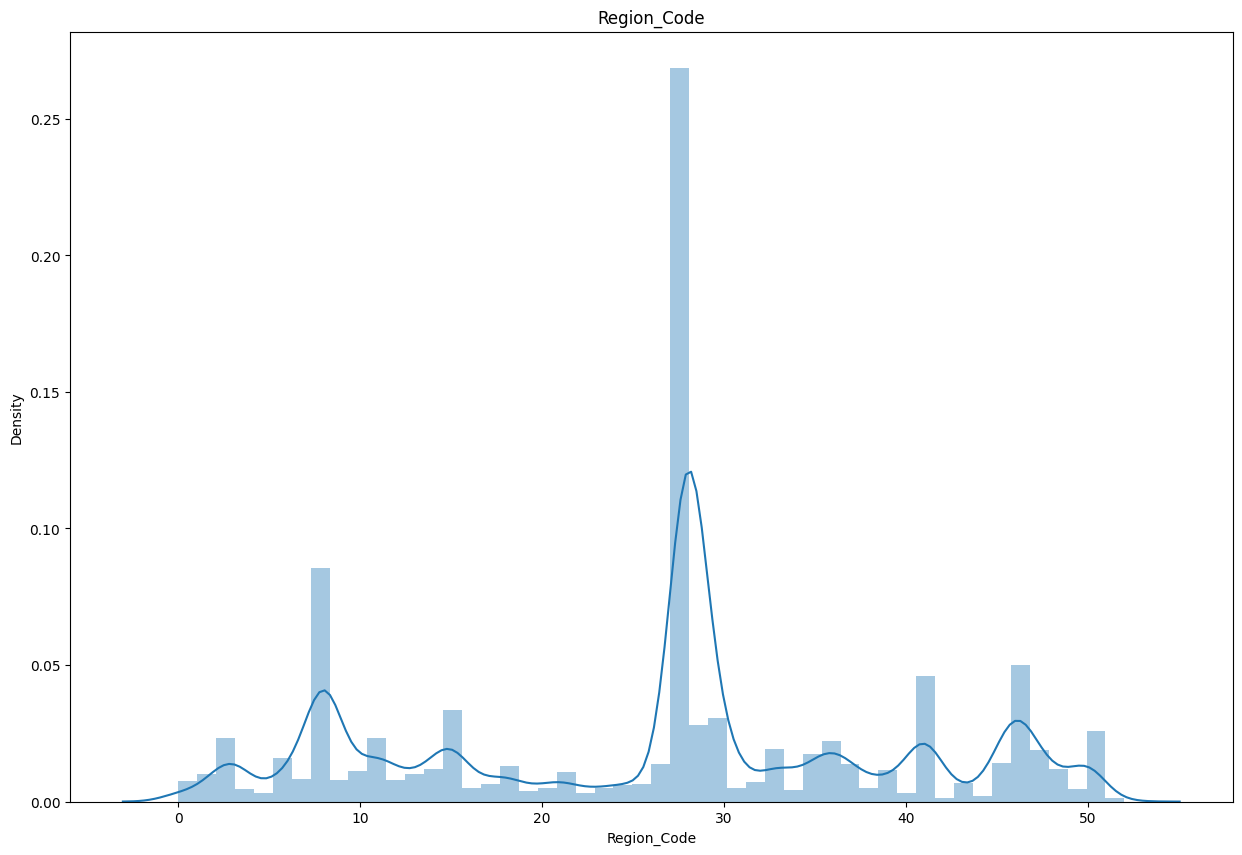

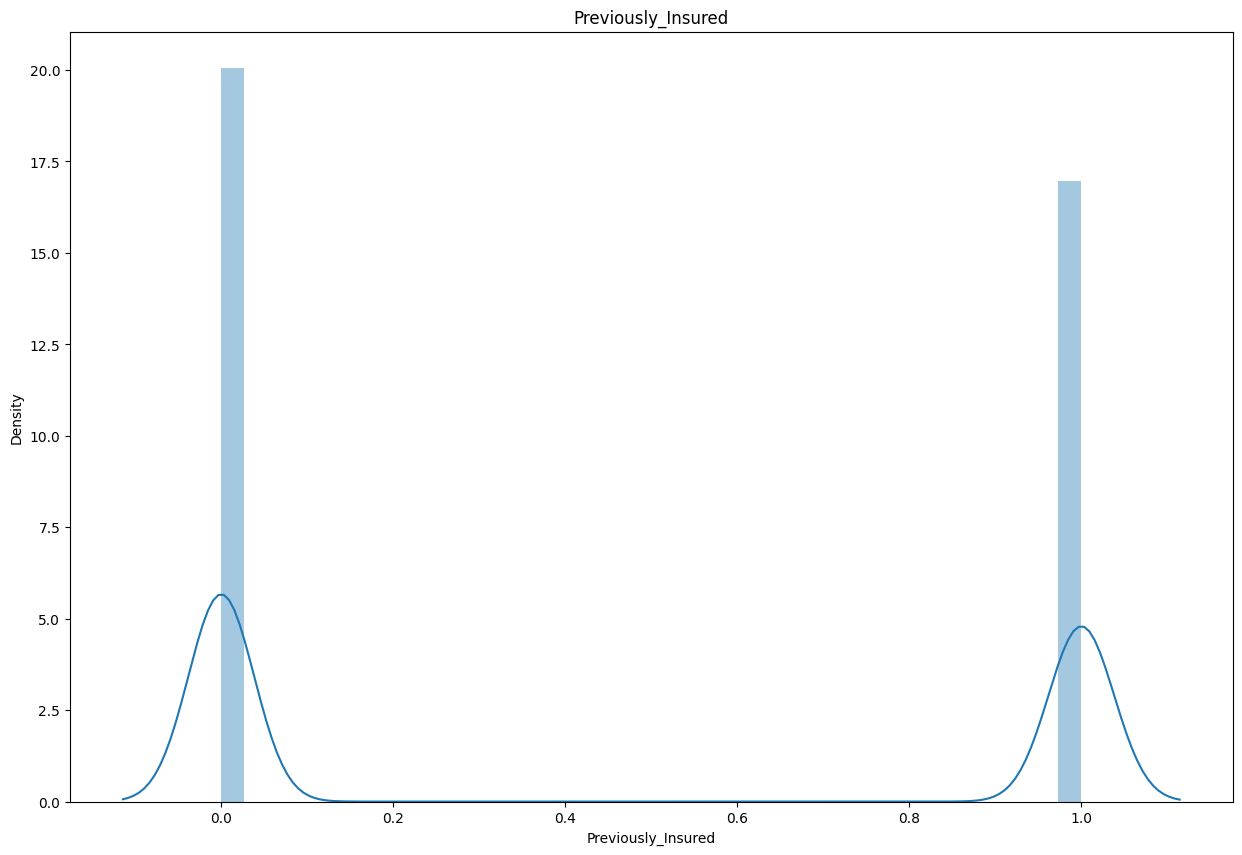

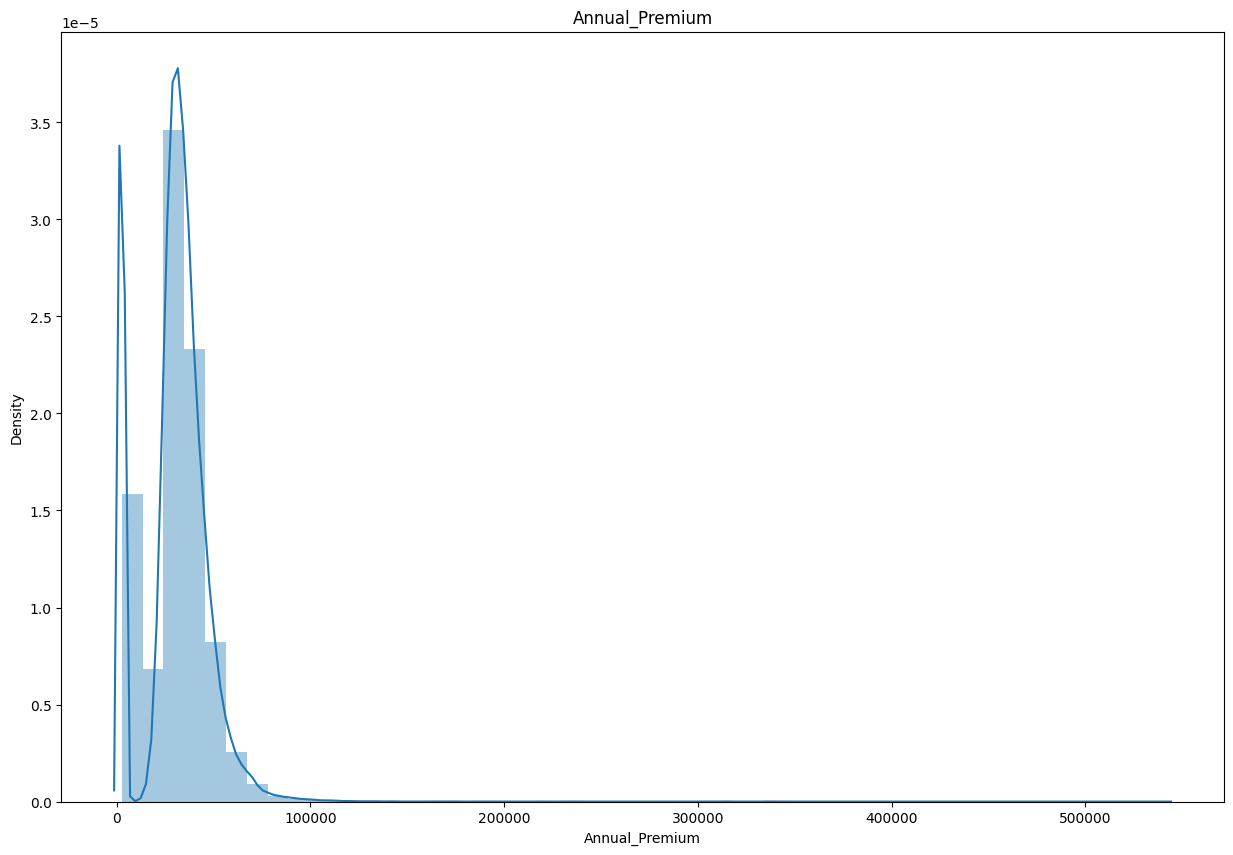

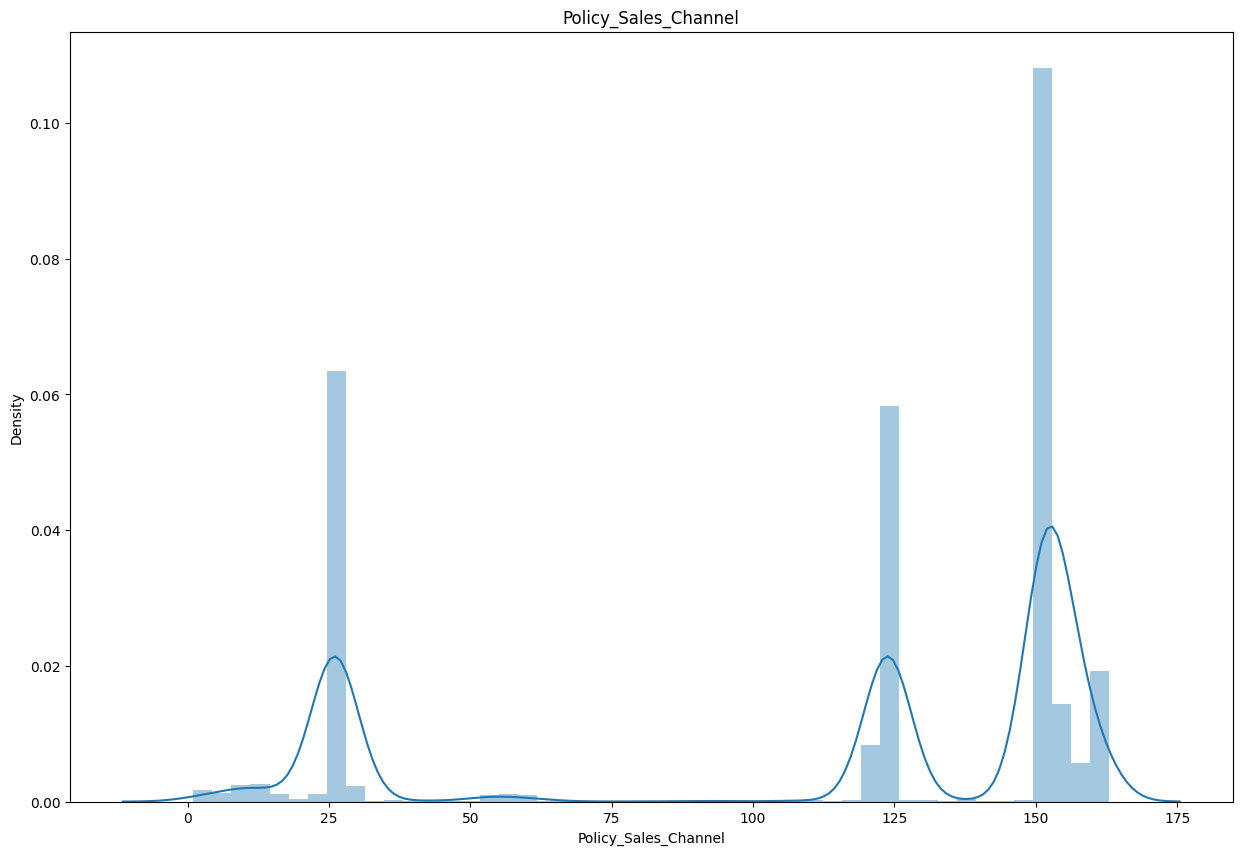

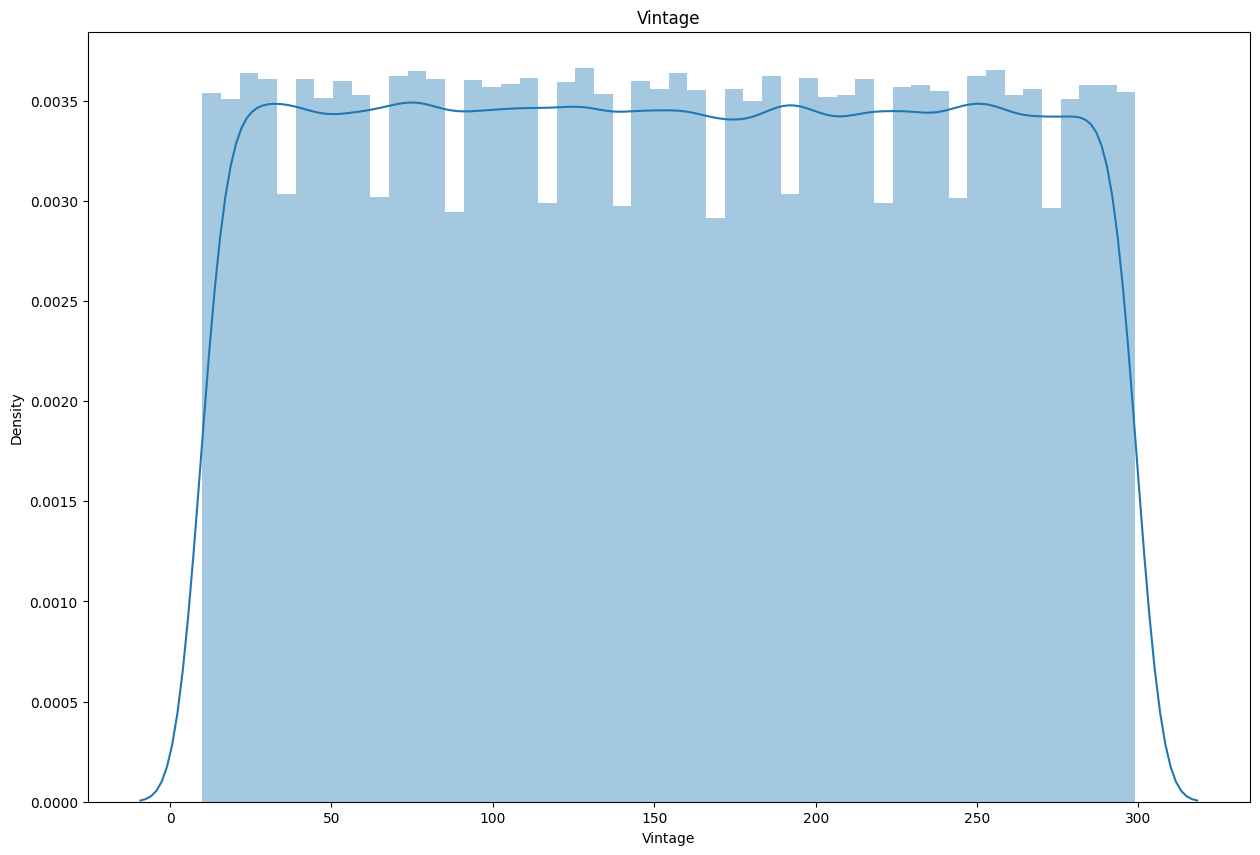

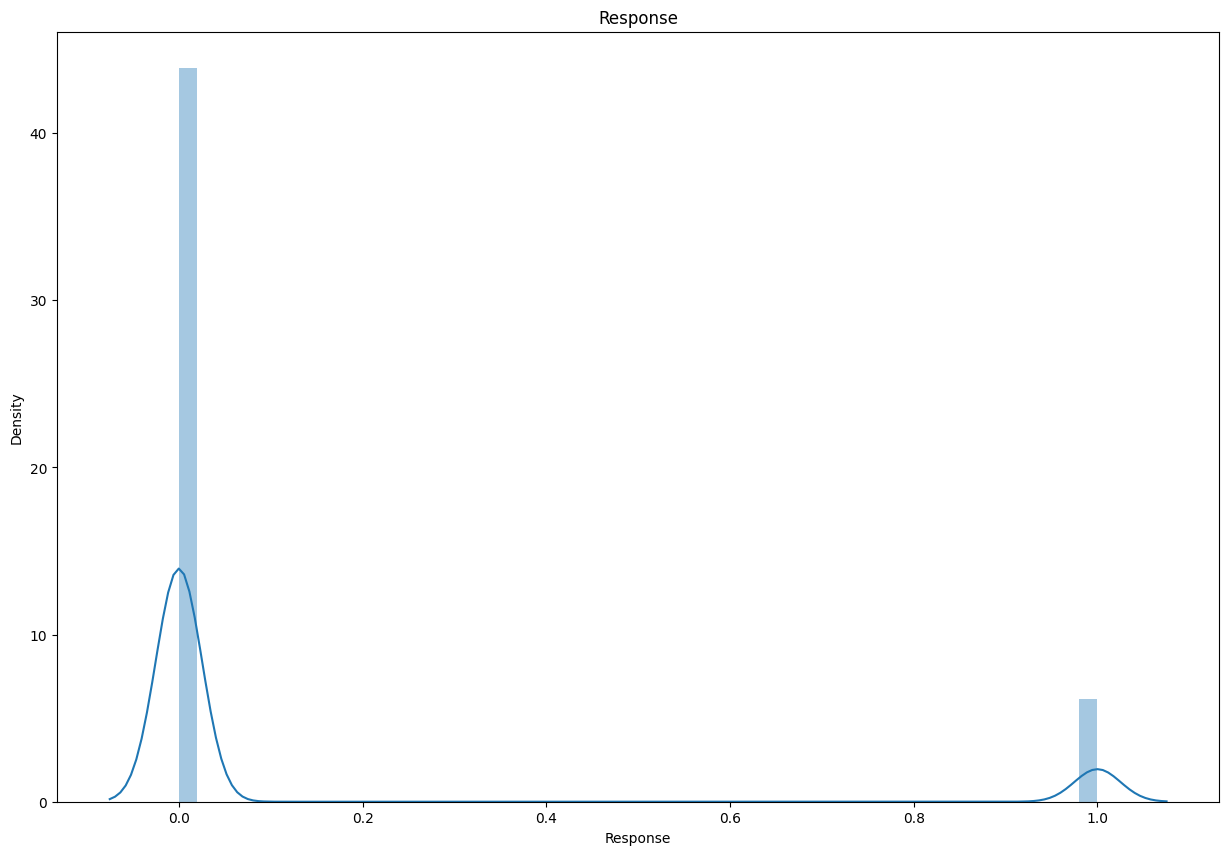

In [54]:
numeric_features = df.describe().columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature)
    ax.set_title(col)
plt.show()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


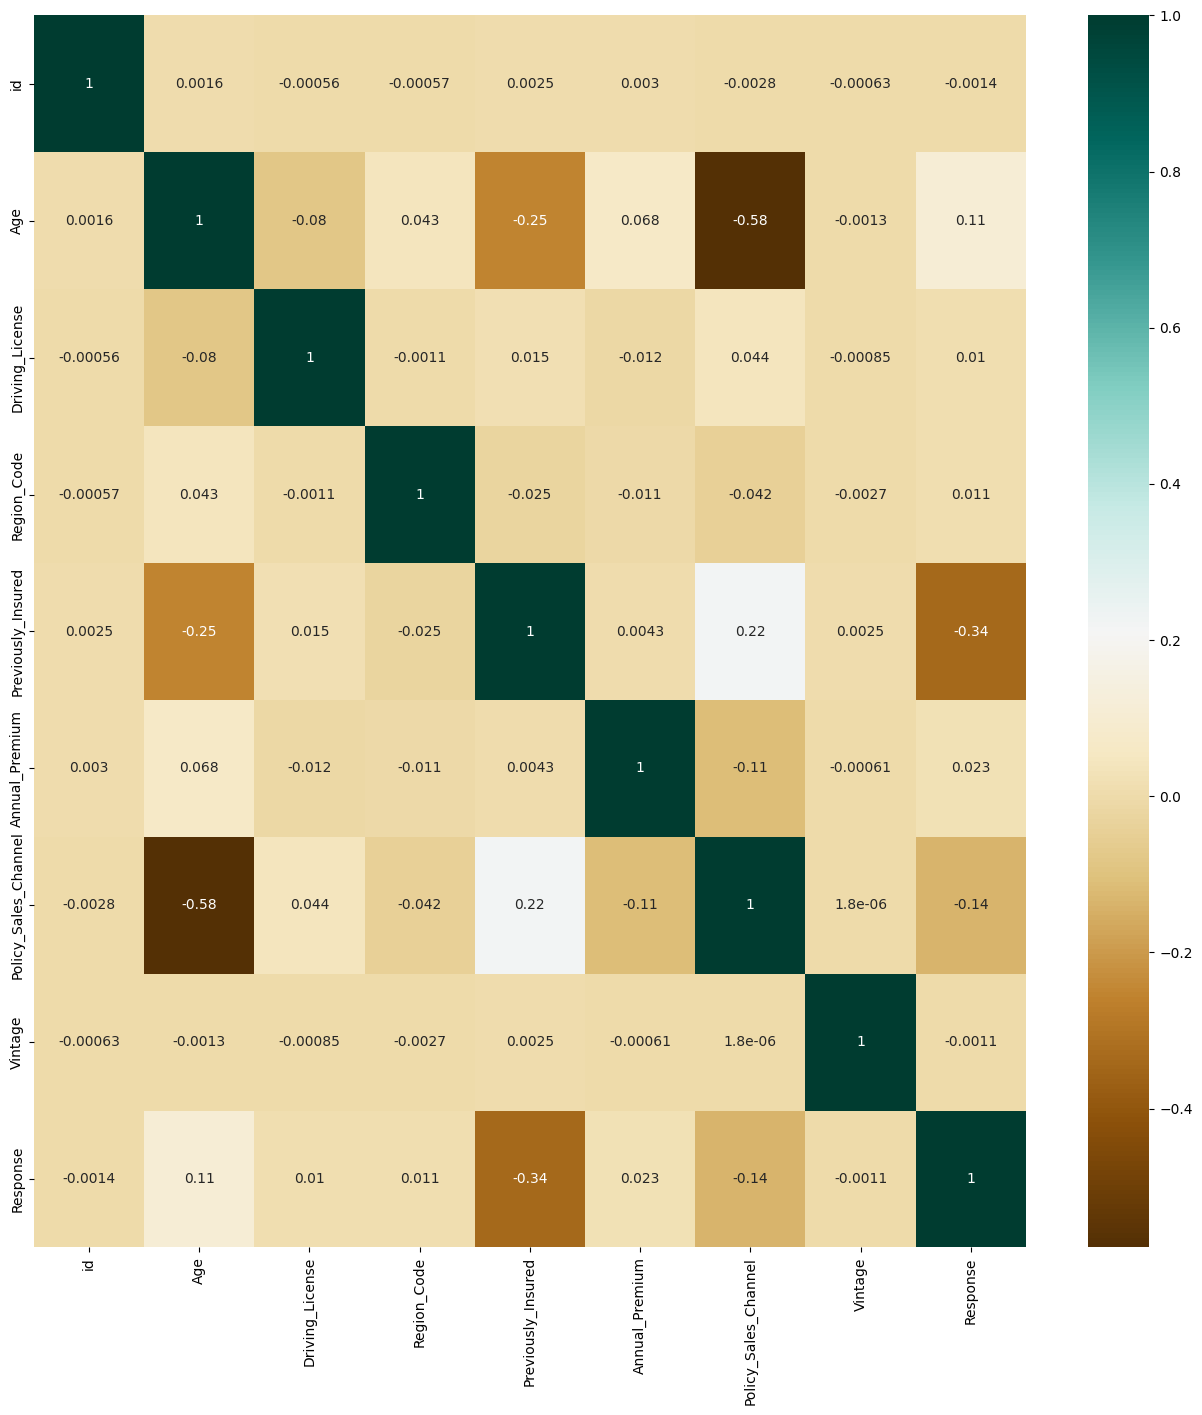

In [55]:

c= df.corr()
plt.figure(figsize = [16, 16])
sns.heatmap(c,cmap="BrBG",annot=True)
c

As from above correlation map , we got visuals like column <B>AGE</B> and <B>RESPONSE</B> are highly correlated to each other and <B>POLICY SALES CHANNEL</B> and <B>PREVIOSLY INSURED</b> are correlated to each other.

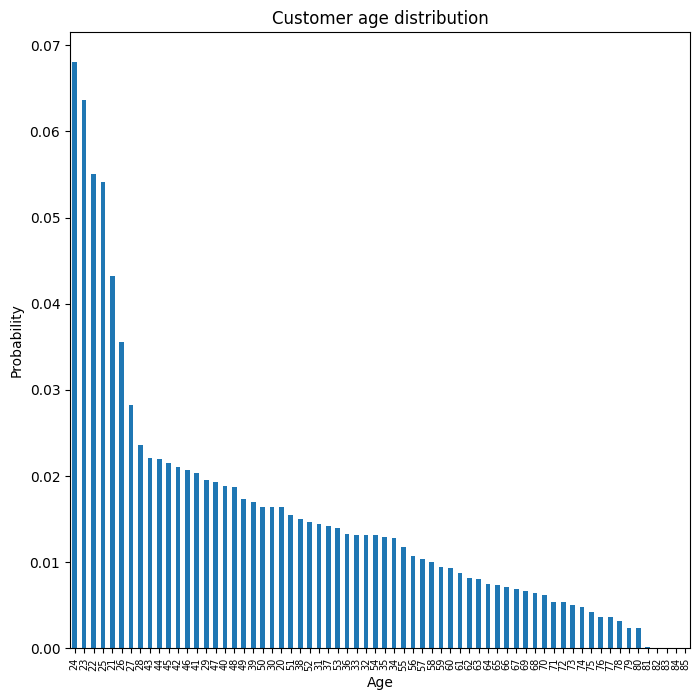

In [56]:
df['Age'].value_counts(normalize=True).plot(kind='bar',figsize=(8,8));
plt.title('Customer age distribution');
plt.ylabel('Probability');
plt.xlabel('Age');
plt.xticks(fontsize=7);

<B>We can see that the largest portion of customers in the data are aged in their twenties. Let's now have a look at the total number of customers that already have a vehicle insurance and the number of customers that are interested in a vehicle insurance.

In [57]:
df_ins = df[df['Previously_Insured']==1]
df_pos = df[df['Response']==1]

<B>How are the already insured customers distributed by age?

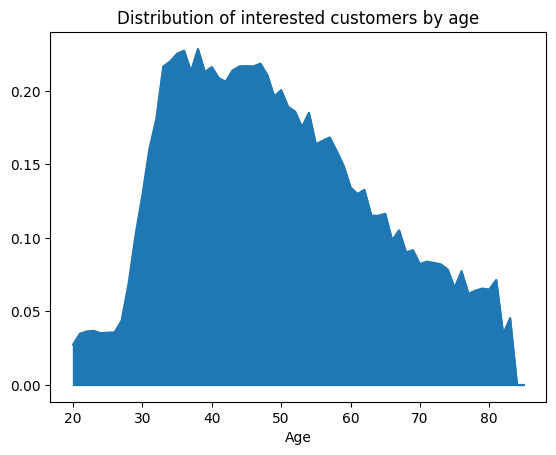

In [58]:

(df_pos['Age'].value_counts()/df['Age'].value_counts()).plot(kind="area");
plt.title("Distribution of interested customers by age");

plt.xlabel('Age');

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

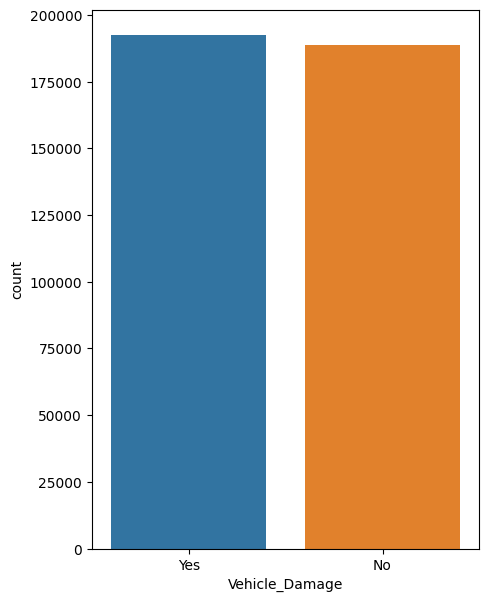

In [59]:

plt.figure(figsize=(5,7))
sns.countplot(x=df['Vehicle_Damage'])

<B>Lets found graph of "Gender vs Response"

<Axes: xlabel='Gender'>

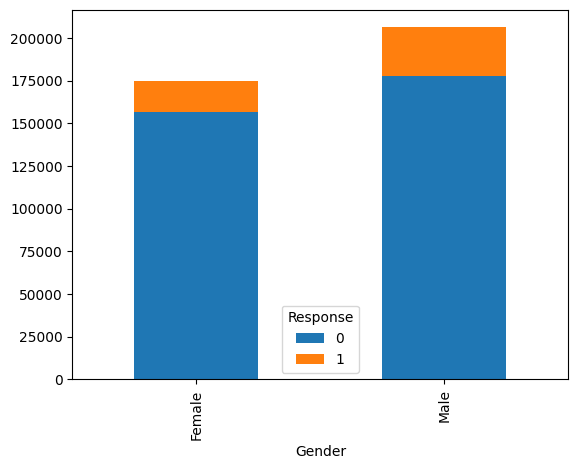

In [60]:

#Gender vs Response
df.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

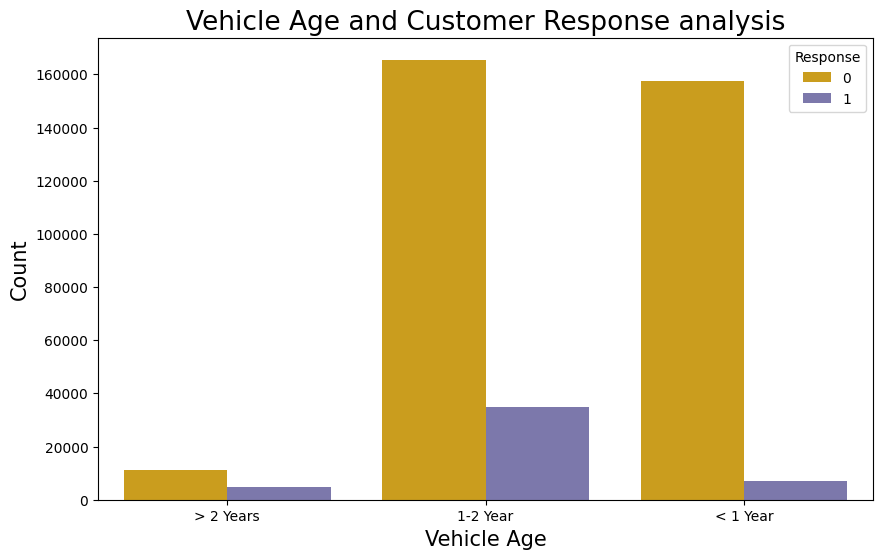

In [61]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Age', hue = 'Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

<B>Lets found graph of "Age VS Response"

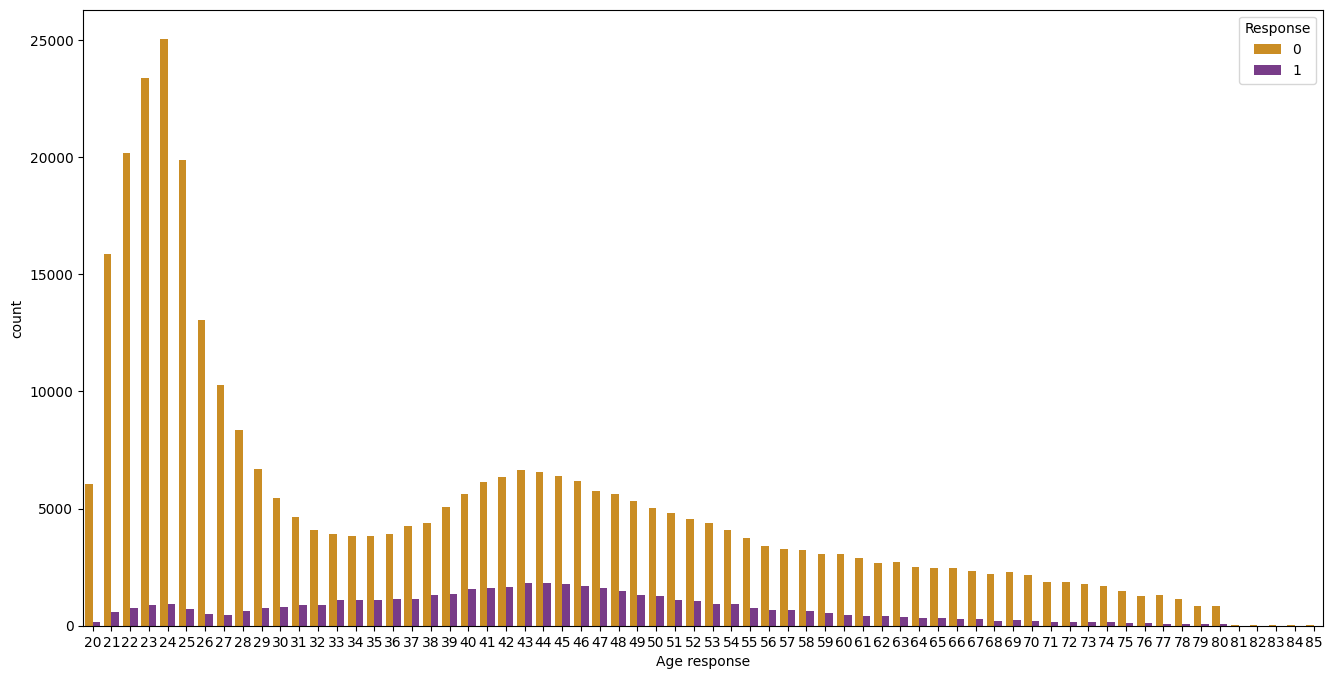

In [62]:
#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

<B><H3>Encoding Object columns


In [63]:


df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [64]:
df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [65]:
df.groupby(["Vehicle_Age"])["Annual_Premium"].nunique()

Vehicle_Age
1-2 Year     41091
< 1 Year     37871
> 2 Years    10827
Name: Annual_Premium, dtype: int64

In [66]:
df.groupby(["Vehicle_Age"])["Previously_Insured"].value_counts()

Vehicle_Age  Previously_Insured
1-2 Year     0                     134991
             1                      65325
< 1 Year     1                     109257
             0                      55529
> 2 Years    0                      15961
             1                         46
Name: Previously_Insured, dtype: int64

In [67]:
df.groupby(["Vehicle_Damage"])["Previously_Insured"].value_counts()


Vehicle_Damage  Previously_Insured
No              1                     164706
                0                      23990
Yes             0                     182491
                1                       9922
Name: Previously_Insured, dtype: int64

In [69]:
path = '/content/drive/MyDrive/2nd ML Classification Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

kf = pd.read_csv(path)

In [70]:
kf['Gender'] = kf['Gender'].map({'Male': 1, 'Female': 0})

In [71]:
kf['Response'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64>

<B><H1>Label Encoding

In [72]:
kf['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [73]:
kf['Vehicle_Age'] = kf['Vehicle_Age'].map({'> 2 Years': 0, '1-2 Year': 1 , '< 1 Year':2})

In [74]:
kf['Vehicle_Damage'] = kf['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

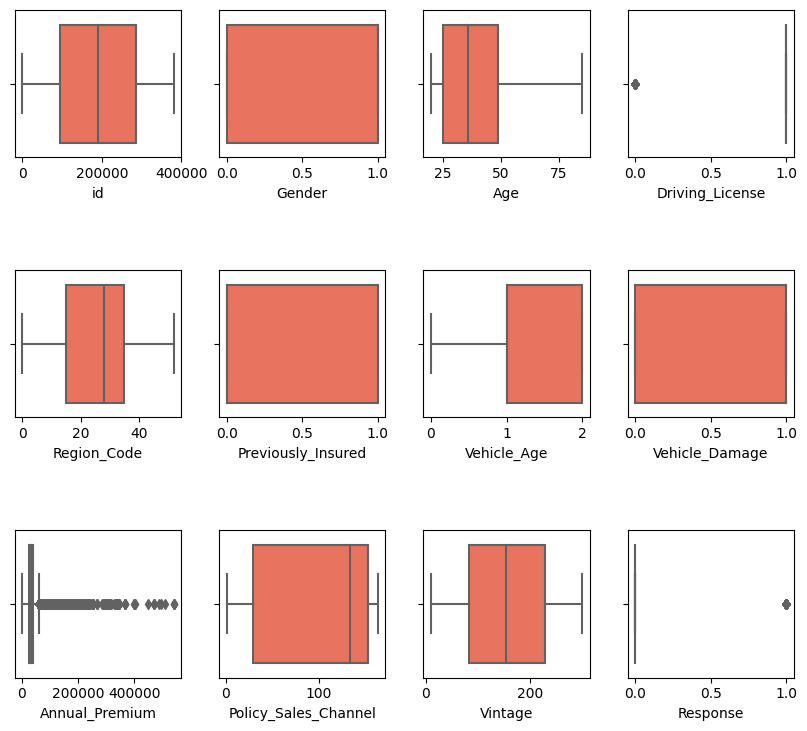

In [75]:
# Write your code to make your dataset analysis ready.

#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in kf.columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=kf,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [76]:
df.drop(['Annual_Premium'], axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,1,26.0,1,1-2 Year,No,26.0,88,0
381105,381106,0,30,1,37.0,1,< 1 Year,No,152.0,131,0
381106,381107,0,21,1,30.0,1,< 1 Year,No,160.0,161,0
381107,381108,1,68,1,14.0,0,> 2 Years,Yes,124.0,74,0


<B><H1>lets clean the database

In [77]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [78]:
kf = clean_dataset(kf)

In [79]:
X1=kf.drop(columns=['Response'])# independent variable
y1 = kf['Response']# dependent variable

[0.19327545 0.00641961 0.13718626 0.00046648 0.09471511 0.05010904
 0.01992757 0.07895136 0.1638215  0.06799465 0.18713295]


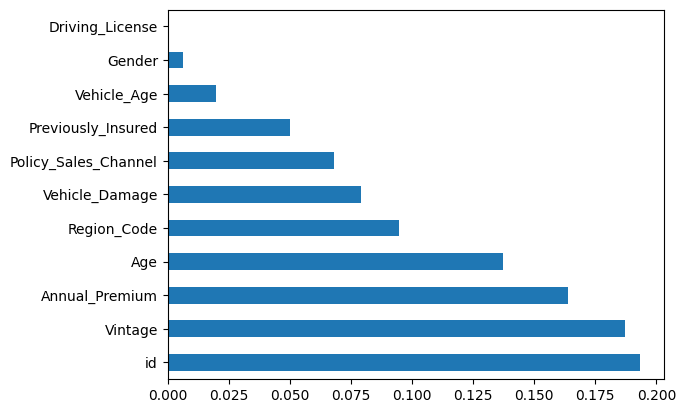

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [81]:
X1=X1.drop(['Driving_License','Gender'],axis=1)

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X1, y1)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_new)))



Original dataset shape Counter({0.0: 334399, 1.0: 46710})
Resampled dataset shape Counter({1.0: 334399, 0.0: 334399})


In [83]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


In [84]:
ytrain.value_counts()

1.0    234087
0.0    234071
Name: Response, dtype: int64

In [85]:
ytest.value_counts()

0.0    100328
1.0    100312
Name: Response, dtype: int64

<H1><B> Model Selection</B></h1>

<B>Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

Dataset has more than 300k records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:

 1.Logistic Regression

 2.Random Forest

 3.XGBClassifier



<B><H1>So Lets Start..


<B><h1>Implementing Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

<B>Get the model coefficients

In [87]:

clf.coef_

array([[-3.11438803e-04, -2.97446953e-01, -4.59965384e-04,
        -1.77041454e+00, -4.40565540e-01,  9.18106516e-01,
         2.01700566e-02, -1.51874775e-01, -9.07037101e-03]])

In [88]:
clf.intercept_

array([-0.8357969])

<B>Evaluating the performance of the trained model

<B>Get the predicted probabilities

In [89]:

train_preds = clf.predict_proba(xtrain)
test_preds = clf.predict_proba(xtest)

In [90]:
xtest

array([[ 1.02908859,  0.78008488,  0.11248085, ...,  1.02096542,
        -1.38518491,  0.21272899],
       [ 0.0508271 ,  1.05884109,  0.11248085, ...,  0.95453315,
        -1.38518491, -1.14954883],
       [ 0.48916687, -1.24089767, -1.94501707, ..., -0.2770877 ,
        -1.38518491, -1.07785   ],
       ...,
       [-1.46282842, -0.96214146, -1.47020985, ...,  0.66742291,
         0.86967942, -1.36464533],
       [ 0.62577017,  1.68604257,  0.11248085, ...,  0.58580612,
         0.36859845,  0.03348191],
       [ 1.47135599, -1.24089767,  0.27074992, ...,  0.15181915,
         0.86967942,  0.26052821]])

In [91]:
test_preds

array([[0.26948709, 0.73051291],
       [0.95680501, 0.04319499],
       [0.99472603, 0.00527397],
       ...,
       [0.40100637, 0.59899363],
       [0.38832205, 0.61167795],
       [0.99626756, 0.00373244]])

In [92]:
train_preds = clf.predict_proba(xtrain)[:,1]
test_preds = clf.predict_proba(xtest)[:,1]

In [93]:
test_preds

array([0.73051291, 0.04319499, 0.00527397, ..., 0.59899363, 0.61167795,
       0.00373244])

In [94]:
# Get the predicted classes
train_class_preds = clf.predict(xtrain)
test_class_preds = clf.predict(xtest)

In [95]:
train_class_preds

array([1., 1., 0., ..., 1., 1., 0.])

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [97]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,ytrain)
test_accuracy = accuracy_score(test_class_preds,ytest)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7839960013499716
The accuracy on test data is  0.7834778708133971


In [98]:
acc_lr=accuracy_score(ytest,test_class_preds)
recall_lr=recall_score(ytest,test_class_preds)
precision_lr=precision_score(ytest,test_class_preds)
f1score_lr=f1_score(ytest,test_class_preds)
AUC_LR=roc_auc_score(test_class_preds,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,test_class_preds))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7834778708133971
ROC_AUC Score: 0.8333678803644434


<B>Learning about the confusion matrix

[[138375  95696]
 [  5428 228659]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

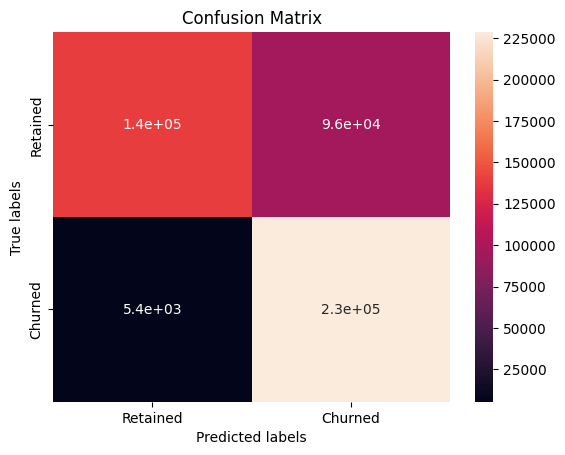

In [99]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(ytrain, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[59201 41127]
 [ 2316 97996]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

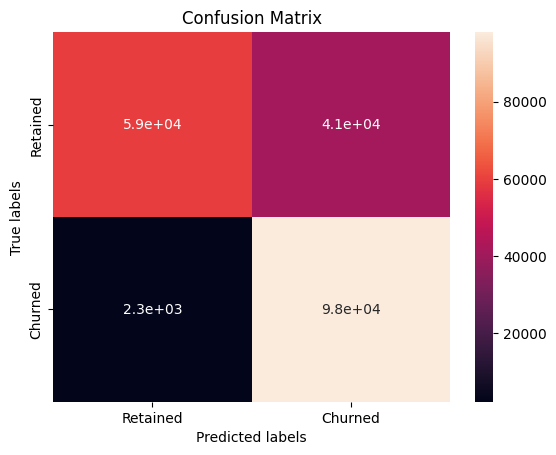

In [100]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(ytest, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

<h1><b>Evaluation metrics for classification models

In [101]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [102]:
train_preds =  classifier.predict(xtrain)
test_preds  = classifier.predict(xtest)

In [103]:
# Obtain accuracy on train set
accuracy_score(ytrain,train_preds)

0.7955903776075598

In [104]:
# Obtain accuracy on test set
acc_rfc = accuracy_score(ytest,test_preds)

In [105]:
# Obtain recall score on test train
recall_score(ytrain,train_preds)

0.9236224138888532

In [106]:
# Obtain recall score on test test
recall_rfc=recall_score(ytest,test_preds)

In [107]:
# Calculate roc_auc score on train set
roc_auc_score(ytrain,train_preds)

0.7955860017716372

In [108]:
# Calculate roc_auc score on test set
roc_auc_rfc = roc_auc_score(ytest,test_preds)

In [109]:
# Obtain precision score on train set
precision_score(ytrain,train_preds)

0.7353388317319955

In [110]:
# Obtain precision score on test set
precision_rfc=precision_score(ytest,test_preds)

In [111]:
# Obtain f1 score on train set
f1_score(ytrain,train_preds)

0.8187960129669465

In [112]:
# Obtain f1 score on test set
f1_score_rfc =f1_score(ytest,test_preds)

In [113]:
# Obtain the confusion matrix on train set
confusion_matrix(ytrain,train_preds)

array([[156254,  77817],
       [ 17879, 216208]])

In [114]:
# Obtain the confusion matrix on test set
confusion_matrix(ytest,test_preds)

array([[66741, 33587],
       [ 7721, 92591]])

<B><h3>lets discuss boosting technique


<B><h3>Implementing Gradient Boosting Classifier


In [115]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,random_state=0)
clf.fit(xtrain, ytrain)
predicted=clf.predict(xtest)
print('Accuracy of the result is:')
print(np.mean(predicted==ytest))

Accuracy of the result is:
0.7965560207336523


In [ ]:
train_preds =  clf.predict(xtrain)
test_preds  = clf.predict(xtest)

In [ ]:
# Obtain accuracy on train set
accuracy_score(ytrain,train_preds)

In [ ]:
# Obtain accuracy on test set
acc_gbc = accuracy_score(ytest,test_preds)

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(ytrain,train_preds)

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score_gbc =roc_auc_score(ytest,test_preds)

In [ ]:
# Calculate recall score on train set
recall_score(ytrain,train_preds)

In [ ]:
# Calculate recall score on test set
recall_gbc = recall_score(ytest,test_preds)

In [ ]:
# Calculate precision score on train set
precision_score(ytrain,train_preds)

In [ ]:
# Calculate precision score on test set
precision_gbc = precision_score(ytest,test_preds)

In [ ]:
# Calculate f1 score on test set
f1_score_gbc = f1_score(ytest,test_preds)

In [ ]:
# Calculate f1 score on train set
f1_score(ytrain,train_preds)

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(ytrain,train_preds)

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(ytest,test_preds)


<B><h1>Implementing XGBClassifier


In [ ]:
from xgboost import XGBClassifier
clfXGB = XGBClassifier(n_estimators=100,random_state=0)
clfXGB.fit(xtrain, ytrain)
predicted=clfXGB.predict(xtest)
print('Accuracy of the result is:')
print(np.mean(predicted==ytest))

In [130]:
train_preds =  clfXGB.predict(xtrain)
test_preds  = clfXGB.predict(xtest)

In [ ]:
# Obtain accuracy on train set
accuracy_score(ytrain,train_preds)

In [ ]:
# Obtain accuracy on test set
acc_xgb = accuracy_score(ytest,test_preds)

In [ ]:
# Calculate recall score on test set
recall_xgb=recall_score(ytest,test_preds)

In [ ]:
# Calculate recall score on train set
recall_score(ytrain,train_preds)

In [ ]:
# Calculate precision score on train set
precision_score(ytrain,train_preds)

In [ ]:
# Calculate precision score on test set
precision_xgb =precision_score(ytest,test_preds)

In [ ]:
# Calculate f1 score score on test set
f1_score_xgb=f1_score(ytest,test_preds)

In [ ]:
# Calculate f1 score score on train set
f1_score(ytrain,train_preds)

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(ytrain,train_preds)

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score_xgb=roc_auc_score(ytest,test_preds)

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(ytrain,train_preds)

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(ytest,test_preds)

<h1><B>Comparing the model

In [ ]:
ind=['Logistic regression','Randomforest','GradientBoostingClassifier','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rfc,acc_gbc,acc_xgb],"Recall":[recall_lr,recall_rfc,recall_gbc,recall_xgb],"Precision":[precision_lr,precision_rfc,precision_gbc,precision_xgb],
    'f1_score':[f1score_lr,f1_score_rfc,f1_score_gbc,f1_score_xgb],"ROC_AUC":[AUC_LR,roc_auc_rfc,roc_auc_score_gbc,roc_auc_score_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

<h5>The <B>ML model</B> for the problem statement was created using python with the help of the dataset, and the ML model created with <B>Random Forest</B> and <B>XGBClassifier</B> models performed better than <B>Logistics Regression model</B>. Thus, for the given problem, the models created by <B>Random Forest</B> and <B>XGBClassifier.

# **Conclusion**

<h2><b>Conclusion</B></h2>

Customers of <B>age between 30 to 60</B> are more likely to <B>buy insurance.</B>

Customers with <B>Driving License</B> have higher chance of buying Insurance.

Customers with <B>Vehicle_Damage</B> are likely to buy insurance.

<B>The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.</B>

comparing <b>ROC curve</B> we can see that <b>Random Forest model</B> preform better. Because curves closer to the top-left corner, it indicate a better performance.